<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/Number%20of%20misspelled%20words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=1ee83ef91b36c0b23835f47e211d86dcfc1e0b51f8d167b2b460ee0dbdd23ec7
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


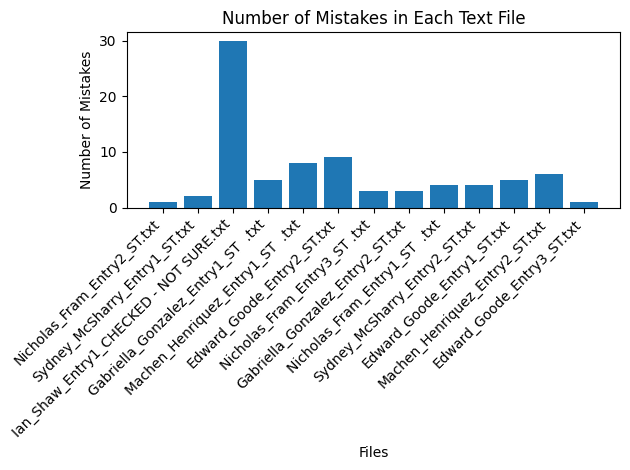

In [2]:
import os
import re
import matplotlib.pyplot as plt
from pymorphy2 import MorphAnalyzer

def count_mistakes(text, morph):
    words = re.findall(r'\b\w+\b', text)  # Извлекаем слова
    mistake_count = 0

    for word in words:
        normal_form = morph.parse(word)[0].normal_form
        if not morph.word_is_known(normal_form):
            mistake_count += 1

    return mistake_count

def main():
    folder_path = "/content/Students_texts"
    file_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.txt')]

    morph = MorphAnalyzer()

    # Словарь для хранения числа неправильно написанных слов в каждом файле
    mistake_counts = {}

    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            cleaned_content = re.sub(r'<[^>]+>', '', content)  # Убираем теги
            mistake_count = count_mistakes(cleaned_content, morph)
            mistake_counts[os.path.basename(file_path)] = mistake_count

    # Выводим столбчатую диаграмму
    plt.bar(mistake_counts.keys(), mistake_counts.values())
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Files')
    plt.ylabel('Number of Mistakes')
    plt.title('Number of Mistakes in Each Text File')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
